In [86]:
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

from ast import literal_eval


In [76]:
# path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_10000.csv')
# path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_1000_pi_wrap_fix.csv')
path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_10000_wide_param.csv')


df = pd.read_csv(path)

In [77]:
df.head()

,params,X,U,obj,solve_time_sec,term_status
0,"[0.0424275910707661, 0.5454229429947808]","[[0.0424275910707661, 0.5454229429947808, 0.0,...","[[6.086514948500631], [3.864833106546834], [2....",416.975101,4.144,LOCALLY_SOLVED
1,"[0.7817573961855622, -1.9420904872289646]","[[0.7817573961851535, -1.8477804815177048, -3....","[[-10.00000009981762], [-10.000000099838925], ...",731.146100,2.787,LOCALLY_INFEASIBLE
2,"[0.051324783084094605, -0.6874541402429584]","[[0.051324783084094605, -0.6874541402429584, 0...","[[-10.000000099985362], [-9.256757726801913], ...",515.980633,0.747,LOCALLY_SOLVED
3,"[-0.9103639899650178, 2.722839007437858]","[[-0.9103639899650178, 2.722839007437858, 0.0,...","[[-10.000000099992645], [-8.287004625629265], ...",767.919345,0.532,LOCALLY_SOLVED
4,"[0.16111996374908233, -1.0854964186941047]","[[0.16111996374908233, -1.0854964186941047, 0....","[[-10.000000099995992], [-10.000000099994102],...",615.487369,0.612,LOCALLY_SOLVED


## Visualize Convergence

In [78]:
df['term_status']

# Import dataset and convert string lists into np arrays
array_elements = ['params', 'X', 'U']
for elem in array_elements:
    df[elem] = df[elem].apply(literal_eval) # Convert strings into lists 
    df[elem] = df[elem].apply(lambda x: np.array(x, dtype=np.float64)) # Convert lists into np arrays of type np.float64


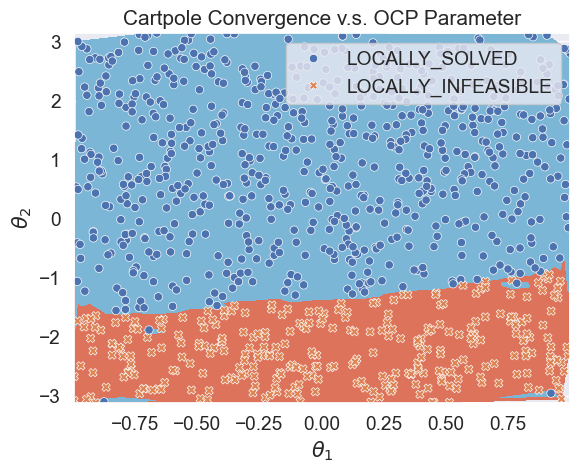

In [81]:

df = df.head(1000)
params = df['params'].to_numpy()
# print(params)
params = np.vstack(params)



sns.set_theme(font_scale=1.25)
# df['term_status'] = np.where(np.random.rand(len(df)) < 0.5, 'LOCALLY_SOLVED', df['term_status'])
df["term_status_binary"] = df['term_status'].map({'LOCALLY_SOLVED': 1, 'LOCALLY_INFEASIBLE': 0})
plt.tricontourf(params[:, 0], params[:, 1], df["term_status_binary"], levels=np.array([0, 0.5, 1.1]), cmap='RdBu')
sns.scatterplot(x=params[:, 0], y=params[:, 1], style=df['term_status'], hue=df['term_status']) 
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Cartpole Convergence v.s. OCP Parameter')
plt.legend(loc='upper right')
plt.show()


# df["term_status_binary"] = df['term_status'].map({'LOCALLY_SOLVED': 1, 'LOCALLY_INFEASIBLE': 0})
# df.head(10)

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot')
# plt.show()


## Visualize Value Function

<Axes: >

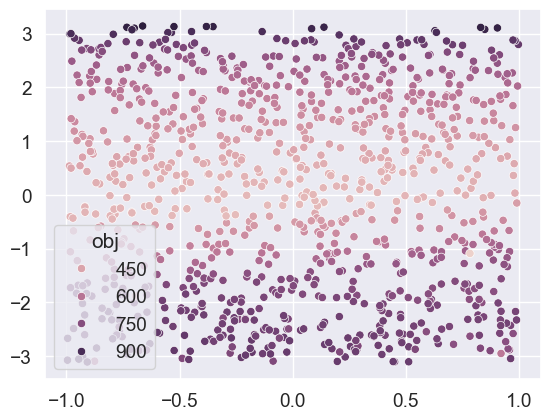

In [80]:
sns.scatterplot(x=params[:, 0], y=params[:, 1], hue=df['obj'])


### Examine the distribution of solve times

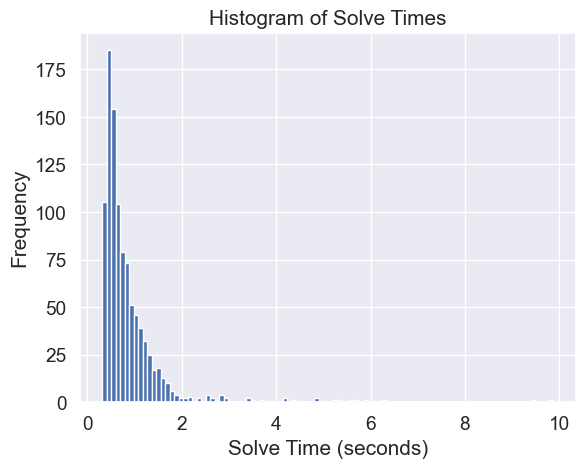

NormaltestResult(statistic=1147.6906359755221, pvalue=6.055429216289899e-250)

In [88]:
df["solve_time_sec"]

plt.hist(df["solve_time_sec"], bins=100)
plt.xlabel("Solve Time (seconds)")
plt.ylabel("Frequency")
plt.title("Histogram of Solve Times")
plt.show()

sp.stats.normaltest(df["solve_time_sec"])